In [2]:
# ==============================
# UBER DATA ANALYSIS PROJECT
# ==============================

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap



In [3]:
# Set style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)


In [18]:
print("Dataset shape:", df.shape)


Dataset shape: (150000, 25)


In [19]:
print(df.head())


        Date      Time    Booking ID   Booking Status   Customer ID  \
0 2024-03-23  12:29:38  "CNR5884300"  No Driver Found  "CID1982111"   
1 2024-11-29  18:01:39  "CNR1326809"       Incomplete  "CID4604802"   
2 2024-08-23  08:56:10  "CNR8494506"        Completed  "CID9202816"   
3 2024-10-21  17:17:25  "CNR8906825"        Completed  "CID2610914"   
4 2024-09-16  22:08:00  "CNR1950162"        Completed  "CID9933542"   

    Vehicle Type      Pickup Location      Drop Location  Avg VTAT  Avg CTAT  \
0          eBike          Palam Vihar            Jhilmil       NaN       NaN   
1       Go Sedan        Shastri Nagar  Gurgaon Sector 56       4.9      14.0   
2           Auto              Khandsa      Malviya Nagar      13.4      25.8   
3  Premier Sedan  Central Secretariat           Inderlok      13.1      28.5   
4           Bike     Ghitorni Village        Khan Market       5.3      19.6   

   ...  Incomplete Rides Reason Booking Value  Ride Distance Driver Ratings  \
0  ...       

Available columns: ['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID', 'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT', 'Avg CTAT', 'Cancelled Rides by Customer', 'Reason for cancelling by Customer', 'Cancelled Rides by Driver', 'Driver Cancellation Reason', 'Incomplete Rides', 'Incomplete Rides Reason', 'Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating', 'Payment Method', 'hour', 'weekday', 'day', 'month']
Using datetime column: Date


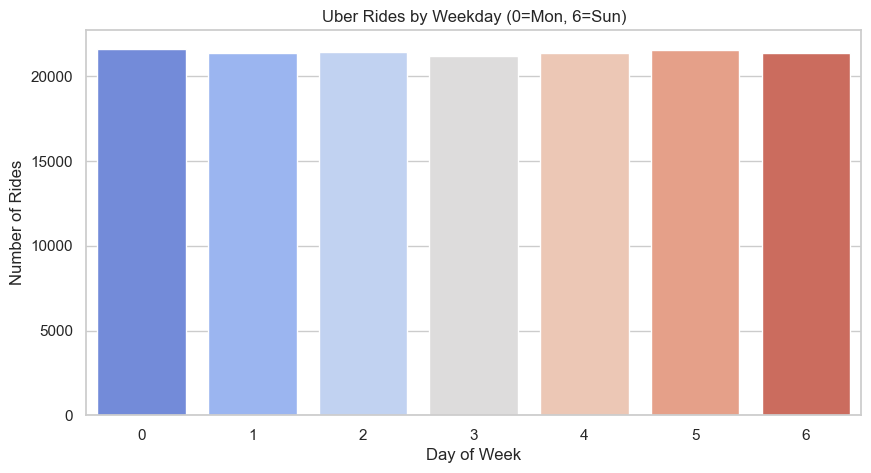

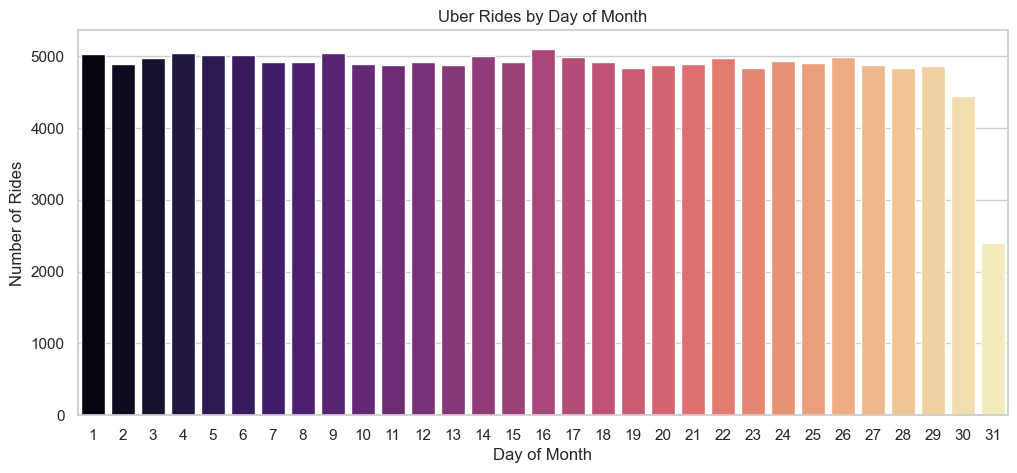

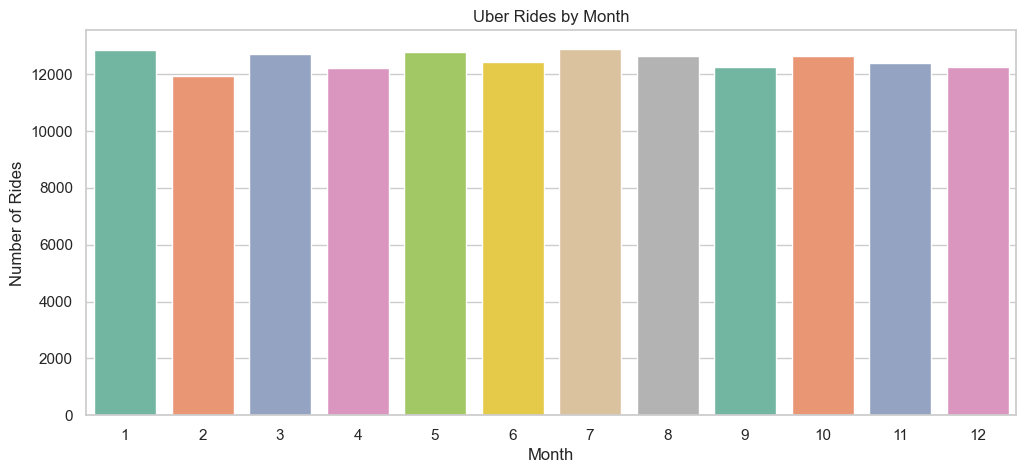

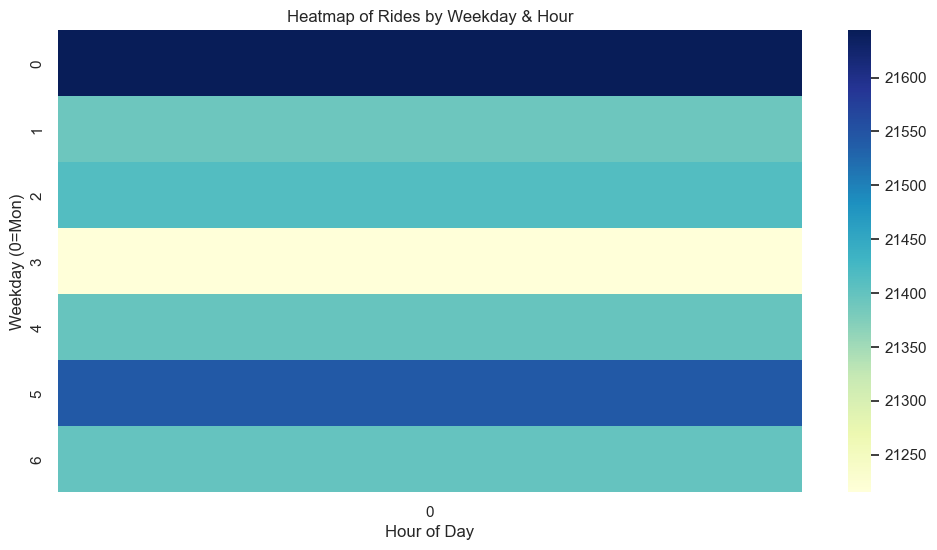

In [16]:
# ==============================
# Uber Ride Data - EDA (Safe Version)
# ==============================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load your dataset ---
# df = pd.read_csv("ncr_ride_bookings.csv")   # uncomment if needed

# --- Check available columns ---
print("Available columns:", df.columns.tolist())

# --- Find datetime column automatically ---
datetime_col = None
for col in df.columns:
    if "time" in col.lower() or "date" in col.lower():
        datetime_col = col
        break

if datetime_col is None:
    raise KeyError("No datetime column found. Please check your dataset.")

print(f"Using datetime column: {datetime_col}")

# --- Convert to datetime ---
df[datetime_col] = pd.to_datetime(df[datetime_col], errors='coerce')

# --- Extract time features ---
df['hour'] = df[datetime_col].dt.hour
df['weekday'] = df[datetime_col].dt.weekday   # 0 = Monday, 6 = Sunday
df['day'] = df[datetime_col].dt.day
df['month'] = df[datetime_col].dt.month

# --- EDA Visualizations ---



## B. Rides per Weekday
plt.figure(figsize=(10,5))
sns.countplot(x="weekday", data=df, palette="coolwarm")
plt.title("Uber Rides by Weekday (0=Mon, 6=Sun)")
plt.xlabel("Day of Week")
plt.ylabel("Number of Rides")
plt.show()

## C. Rides per Day of Month
plt.figure(figsize=(12,5))
sns.countplot(x="day", data=df, palette="magma")
plt.title("Uber Rides by Day of Month")
plt.xlabel("Day of Month")
plt.ylabel("Number of Rides")
plt.show()

## D. Rides per Month
plt.figure(figsize=(12,5))
sns.countplot(x="month", data=df, palette="Set2")
plt.title("Uber Rides by Month")
plt.xlabel("Month")
plt.ylabel("Number of Rides")
plt.show()

## E. Heatmap (Hour vs Weekday)
plt.figure(figsize=(12,6))
sns.heatmap(df.groupby(['weekday','hour']).size().unstack(),
            cmap="YlGnBu", annot=False, cbar=True)
plt.title("Heatmap of Rides by Weekday & Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Weekday (0=Mon)")
plt.show()


In [20]:
df.tail()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,hour,weekday,day,month
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,...,NaN,475.0,40.08,3.7,4.1,Uber Wallet,0,0,11,11
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,...,NaN,1093.0,21.31,4.8,5.0,UPI,0,6,24,11
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,NaN,852.0,15.93,3.9,4.4,Cash,0,2,18,9
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,...,NaN,333.0,45.54,4.1,3.7,UPI,0,5,5,10
149999,2024-03-10,15:38:03,"""CNR3447390""",Completed,"""CID4108667""",Premier Sedan,Ashok Park Main,Gurgaon Sector 29,3.5,33.7,...,NaN,806.0,21.19,4.6,4.9,Credit Card,0,6,10,3


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Date                               150000 non-null  datetime64[ns]
 1   Time                               150000 non-null  object        
 2   Booking ID                         150000 non-null  object        
 3   Booking Status                     150000 non-null  object        
 4   Customer ID                        150000 non-null  object        
 5   Vehicle Type                       150000 non-null  object        
 6   Pickup Location                    150000 non-null  object        
 7   Drop Location                      150000 non-null  object        
 8   Avg VTAT                           139500 non-null  float64       
 9   Avg CTAT                           102000 non-null  float64       
 10  Cancelled Rides by C

In [22]:
df.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating,hour,weekday,day,month
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000,150000.0,150000.000000,150000.000000,150000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584,0.0,2.996987,15.646087,6.490940
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819,0.0,2.003202,8.781698,3.444028
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000,0.0,0.000000,1.000000,1.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000,0.0,1.000000,8.000000,3.000000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000,0.0,3.000000,16.000000,7.000000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000,0.0,5.000000,23.000000,9.000000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000,0.0,6.000000,31.000000,12.000000
